# HOMEWORK 2
For this homework you will have to complete and implement the colour balancing for:
* Gray world algorithm
* Scale-by-max algorithm

You are free to use your own images. Experiment with more images and think about the effect each of the algorithms has on the resulting (balanced) image.

### Colour Balancing
In this notebook we will show different type of colour balancing making use of von Kries' hypothesis.

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

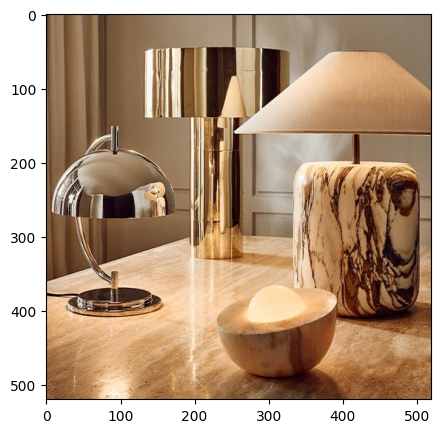

In [45]:
img = cv2.imread('../data/lamp2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### White patch
In white patch algorithm we choose a group of pixels we know they should be white. We then scale the resulting image colour channels by this white patch.

[1.00790514 1.11842105 1.36363636]


(<Axes: >, <matplotlib.image.AxesImage at 0x1e48c467190>)

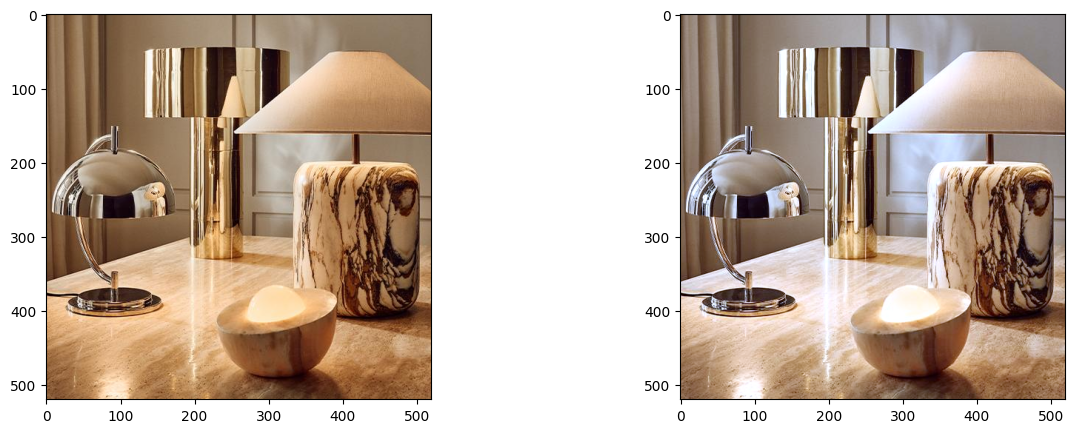

In [47]:
# Define white patch and the coefficients
# row, col = 485, 864 
row, col =400,300
white = img[row, col, :]
coeffs = 255.0/white
print(coeffs)
# Apply white balancing and generate balanced image
balanced = np.zeros_like(img, dtype=np.float32)
for channel in range(3):
    balanced[..., channel] = img[..., channel] * coeffs[channel]

# White patching does not guarantee that the dynamic range is preserved, images must be clipped.
balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)

### Gray world
This algorithm assumes that a scene, on average, is gray.

[1, 1.268161971018861, 1.692483533174114]


(<Axes: >, <matplotlib.image.AxesImage at 0x1e4b01ede40>)

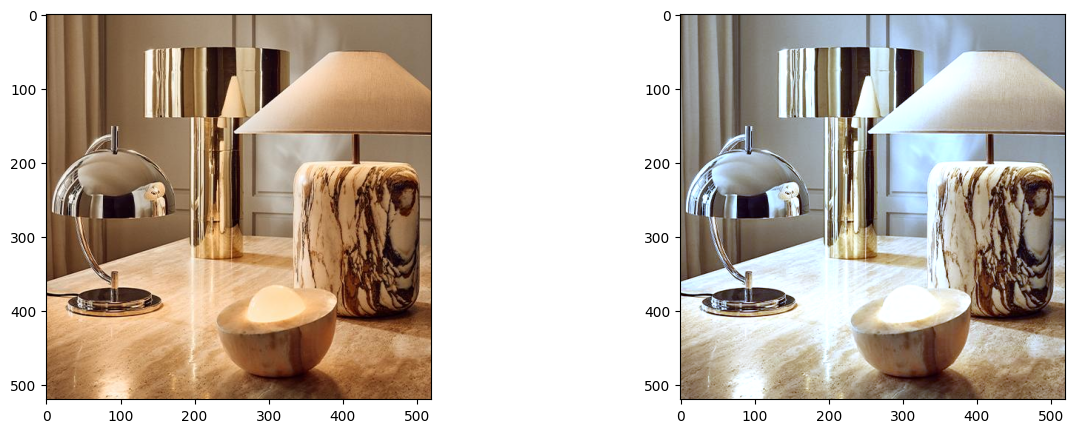

In [48]:
# Load your image
img1 = cv2.imread('../data/lamp2.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)


red,green,blue=cv2.split(img1)

# Compute the mean values for all three colour channels (red, green, blue)


mean_r=np.mean(red)
mean_g = np.mean(green)
mean_b = np.mean(blue)

# Compute the coefficients kr, kg, kb
# Note: there are 3 coefficients to compute but we only have 2 equations.
# Therefore, you have to make an assumption, fix the value of one of the
# coefficients and compute the remining two
# Hint: You can fix the coefficient of the brightest colour channel to 1.

max_mean_color=max(mean_r,mean_g,mean_b)

if max_mean_color== mean_r:
        kr =1
        kg=mean_r/mean_g
        kb=mean_r/mean_b
elif max_mean_color==mean_g:
        kg =1
        kr=mean_g/mean_r
        kb=mean_g/mean_b
else :
        kb =1
        kg=mean_b/mean_g
        kr=mean_b/mean_r


coef=[kr,kg,kb]

print(coef)

# # Apply color balancing and generate the balanced image
balanced =np.zeros_like(img1,dtype=np.float32) 
for ch in range(3):
    balanced[...,ch]=img1[...,ch]*coef[ch]


balanced = balanced/255
balanced[balanced > 1] = 1
# # Show the original and the balanced image side by side
plt.subplot(121), plt.imshow(img1)
plt.subplot(122), plt.imshow(balanced)

### Scale-by-max
This is a straightforward algorithm that scales each colour channel by its maximum value. Note that it is sensitive to noise and saturations.

[1.0, 1.1135371179039302, 1.3076923076923077]


(<Axes: >, <matplotlib.image.AxesImage at 0x1e4d1a278b0>)

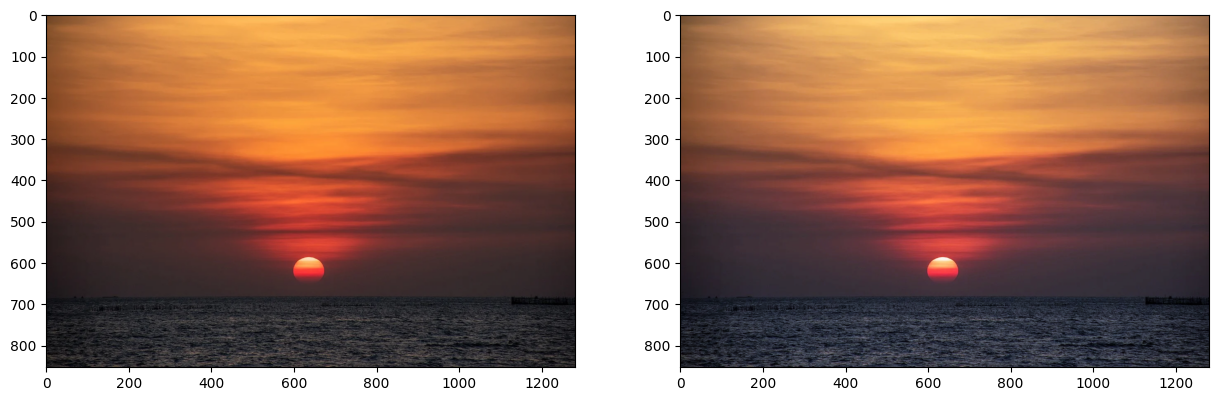

In [58]:
# Load your image
img = cv2.imread('../data/sea2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

r,g,b=cv2.split(img)

# Compute the maximum values for all three colour channels (red, green, blue)
max_r = np.max(r)
max_g = np.max(g)
max_b = np.max(b)

kr=255/max_r
kg=255/max_g
kb=255/max_b
coef=[kr,kg,kb]
print(coef)
# Apply scale-by-max balancing and generate the balanced image
balanced =np.zeros_like(img,dtype=np.float32) 
for ch in range(3):
    balanced[...,ch]=img[...,ch]*coef[ch]


balanced = balanced/255
balanced[balanced > 1] = 1

plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(balanced)